# Lab 03 (Advanced) - Análise Exploratória de Dados (EDA): Técnicas Avançadas
**Disciplina:** Extração e Preparação de Dados | **Professor:** Luis Aramis

Neste laboratório avançado, iremos além do `.describe()` e `.value_counts()`. Aprenderemos a diagnosticar dados faltantes, detectar *outliers* (valores atípicos), criar visualizações focadas em distribuição e analisar a correlação entre variáveis numéricas usando o dataset do **Titanic**.

## 1. Setup e Carga
Importe `pandas`, `numpy`, `matplotlib.pyplot` e `seaborn`.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual do seaborn
sns.set_theme(style="whitegrid")

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print('Dataset carregado.')

#tamanho do dataset:
df.isnull().sum()

Dataset carregado.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Diagnóstico e Tratamento de Dados Faltantes
Valores nulos (NaN) podem quebrar algoritmos de ML. Primeiro, precisamos saber onde eles estão.

In [31]:
# Quantos nulos existem em cada coluna?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exercício 2.1: Estratégias de Imputação
1.  A coluna `Cabin` tem muitos nulos. Crie uma nova coluna `Has_Cabin` que contenha `1` se o passageiro tinha cabine listada e `0` se era nulo (`NaN`).
2.  A coluna `Age` (Idade) não tem tantos nulos a ponto de precisarmos deletá-la. Preencha os nulos da coluna `Age` com a **mediana** das idades.

In [43]:
#1. coluna 'Has_Cabin' > coluna binária indicando a partir da coluna 'Cabin' (passageiro tinha ou não cabine> nulo ou não)
df['Has_Cabin']=df['Cabin'].isna().astype(int)

#Checar se foi criada corretamente
colunas = ['Cabin', 'Has_Cabin']
df_cabine = df[colunas]
df_cabine 

,Cabin,Has_Cabin
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1
...,...,...
886,NaN,1
887,B42,0
888,NaN,1
889,C148,0


In [ ]:
#2. preencher age com mediana 
mediana_idade = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_idade)
#checar se foi preenchida: (se ainda existem valores nan)
df['Age'].isna().sum()

np.int64(0)

## 3. Detecção de Outliers (Valores Atípicos)
Outliers distorcem análises de média e desvio padrão. Uma forma clássica de visualizá-los é usando o **Boxplot**.

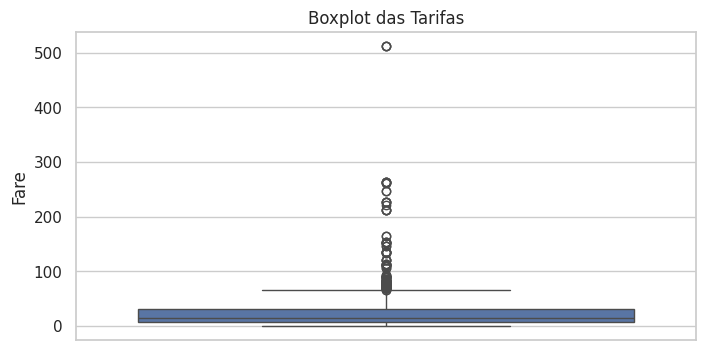

In [ ]:
# Visualizando outliers na Tarifa (Fare)
plt.figure(figsize=(8,4))
sns.boxplot(y=df['Fare']) #y para o boxplot ficar na vertical, se quiser ele na horizontal é só colocar o x
plt.title('Boxplot das Tarifas')
plt.show()

### Exercício 3.1: Filtro via IQR
1. Calcule o intervalo interquartil (IQR) para a coluna `Fare` (Q3 - Q1).
2. Considere como outlier qualquer valor acima de `Q3 + 1.5 * IQR`.
3. Quantos passageiros são considerados outliers pela tarifa?

In [ ]:
#IQR para fare: 
#quantile é uma função que calcula um quantil de uma variável numérica
    #quantil é um valor que divide a distribuição dos dados em partes iguais > valor abaixo do qual uma certa porcentagem dos dados está localizada (quantil 0.25 (Q1) é o valor abaixo do qual 25% dos dados estão localizados)

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

Q1: 7.9104 #25 % das pessoas pagaram até 7.91
Q3: 31.0 #75 % das pessoas pagaram até 23.08
IQR: 23.0896

IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

corte_outliers = Q3+(1.5*IQR)
df['outliers'] = df['Fare'] > corte_outliers
df_outliers = df[df['outliers']]
#
print(df_outliers[['Fare', 'ouliers']])

Q1: 7.9104
Q3: 31.0
IQR: 23.0896
         Fare  ouliers
1     71.2833     True
27   263.0000     True
31   146.5208     True
34    82.1708     True
52    76.7292     True
..        ...      ...
846   69.5500     True
849   89.1042     True
856  164.8667     True
863   69.5500     True
879   83.1583     True

[116 rows x 2 columns]


## 4. Visualização de Distribuições
Estatísticas resumidas escondem o formato dos dados. Gráficos de distribuição revelam a verdadeira natureza da variável.

In [ ]:
# Distribuição de Idades KDE (Kernel Density Estimation)
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição de Idades dos Passageiros')
plt.show()

### Exercício 4.1: Segmentação Visual
Use a função `sns.kdeplot()` (ou `histplot` com o parâmetro `hue`) para visualizar a distribuição de idades (`Age`) dividida pelo status de sobrevivência (`Survived`). 

Pergunta: Houve diferença na distribuição de idades entre quem sobreviveu e quem não sobreviveu?

In [ ]:
# Seu código aqui

## 5. Análise de Correlação Numérica
Correlação mede como duas variáveis numéricas se movem juntas (de -1 a 1). Não implica causalidade, mas é útil para feature selection.

In [ ]:
# Selecionar apenas colunas numéricas
num_df = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação de Pearson
corr_matrix = num_df.corr()
corr_matrix

In [ ]:
# Visualizar a correlação com um Heatmap (Mapa de Calor)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Correlação - Titanic')
plt.show()

### Discussão 5.1
Nota: Embora `Survived` e `Pclass` apareçam no mapa numérico, elas são variáveis com significado *categórico/ordinal*. O baixo coeficiente entre `Fare` e `Age` (próximo a 0) indica que não há relação linear forte (pessoas mais velhas não pagavam necessariamente mais caro).

## 6. Agregações Múltiplas Avançadas
No Pandas, o método `.agg()` permite aplicar várias funções matemáticas simultaneamente a um GroupBy.

In [ ]:
# Agrupando por Classe e calculando Múltiplas Estatísticas para a Tarifa (Fare)
df.groupby('Pclass')['Fare'].agg(['mean', 'median', 'std', 'max', 'min'])

## 7. DESAFIO FINAL (Advanced EDA)
1. Cruze as variáveis categóricas: Crie um gráfico de barras (Countplot) para visualizar a contagem de sobreviventes (`Survived`) separados por Classe (`Pclass`) e por Sexo (`Sex`). *Dica: Use `sns.catplot` ou `sns.countplot` com o parâmetro `hue`.*
2. O que o gráfico indica sobre as prioridades no resgate?